# DBSCAN - Code

## What you will learn in this course 🧐🧐

Let's get our hands dirty and code a DBSCAN algorithm using <a href="https://scikit-learn.org/" target="_blank">Sklearn</a>. You will learn:

* How to set up DBSCAN
* How to select values for `min_sample` and `eps`
* Use different type of algorithm within DBSCAN to determine clusters

## Dataset 🔥🔥

For this case let's create our own dataset with random values.

In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# import sklearn and plotly to visualize dataset
from sklearn.datasets import make_moons
# Import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE


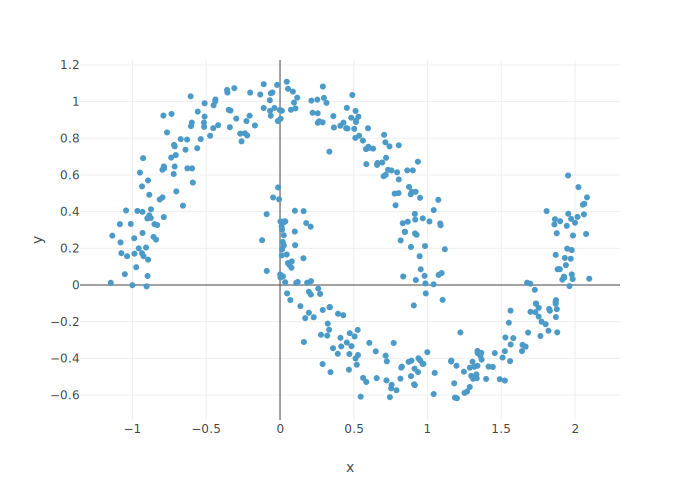

In [3]:
from sklearn.datasets import load_digits

# Let's create dataset that are "moon"-shaped with a little bit of noise
X, _ = make_moons(n_samples=400, noise=0.08)

# Visualize it using plotly
fig = px.scatter(X, x=X[:, 0], y=X[:, 1])

# Plotly output for notebooks
fig.show()

## Let's try K-Means 🙈🙈

As you can see we definitely have a weirdly-shaped cluster. Let's try to apply K-Means to see how it tackles this issue.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



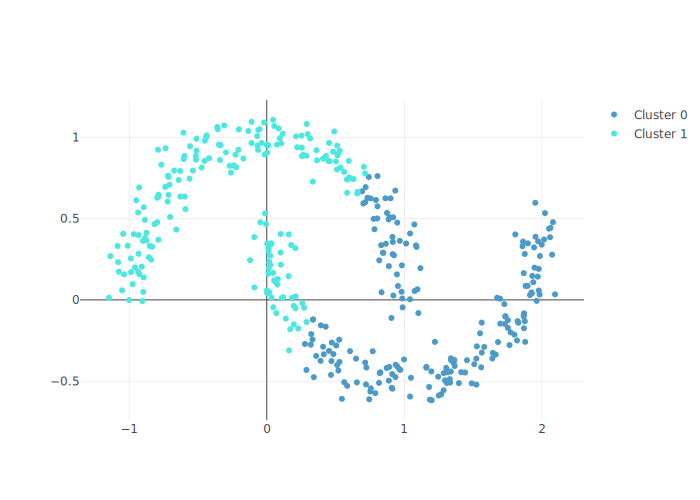

In [4]:
# import KMeans from sklearn
from sklearn.cluster import KMeans

# Instanciate KMeans
kmeans = KMeans(n_clusters=2)

# Fit on data
## No need to normalize data, it already is!
kmeans.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in range(kmeans.n_clusters):
    label = X[kmeans.predict(X) == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

As you can see, K-Means does a pretty bad job 😥 at creating nice clusters from this *moon-shaped* dataset. So we need to find something else. Let's use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN" target="_blank">DBSCAN</a> now.

## Apply DBSCAN 🚀🚀

Let's check out how DBSCAN performs on this *moon-shaped* dataset.

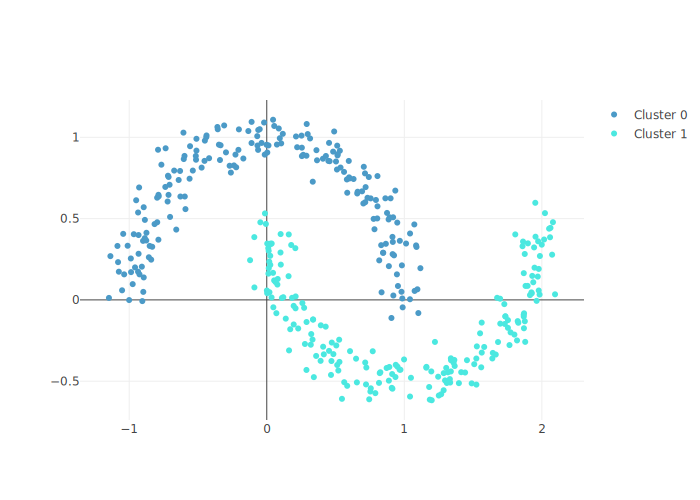

In [5]:
# import DBSCAN from sklearn and numpy
from sklearn.cluster import DBSCAN
import numpy as np

# Instanciate DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

🎉🎉 Yayy !! DBSCAN is doing a much better job at creating clusters!

## Select `eps` & `min_sample`

In the above code, we specified `eps=0.2` and `min_sample=3`. But why did do that? Well let's play around to see the influence of these two parameters.

### Play with `eps` 🤙

Let's first play around with `eps`. As a reminder `eps` is the *maximum distance which determines whether an observation belongs to a core sample or not*. Let's start with high `eps`.

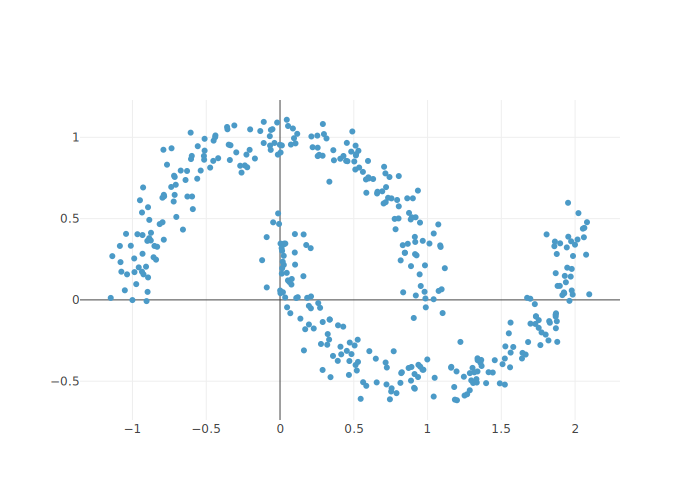

In [6]:
# Instanciate DBSCAN with High eps
db = DBSCAN(eps=1, min_samples=5, metric="euclidean", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

As you can see, DBSCAN wasn't able to find two clusters because `eps` was extremely high. Therefore, we obtain a very low density cluster.

Let's now try with a very low `eps`:

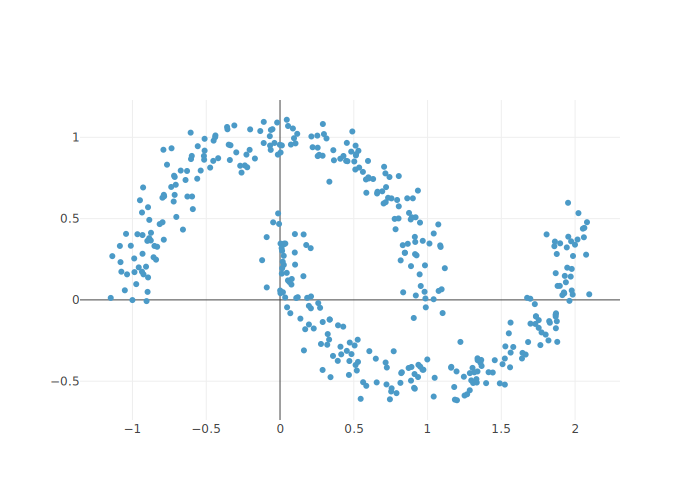

In [8]:
# Instanciate DBSCAN with LOW eps
db = DBSCAN(eps=0.001, min_samples=5, metric="euclidean", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

This time all data points are considered *outliers*! Which is definitely not what we want either.

### Play with `min_sample` 😎

Let's now play with `min_sample` parameter. As a reminder `min_sample` determines the minimum number of observations to create a *core-sample*. Let's first have a high `min_sample`.

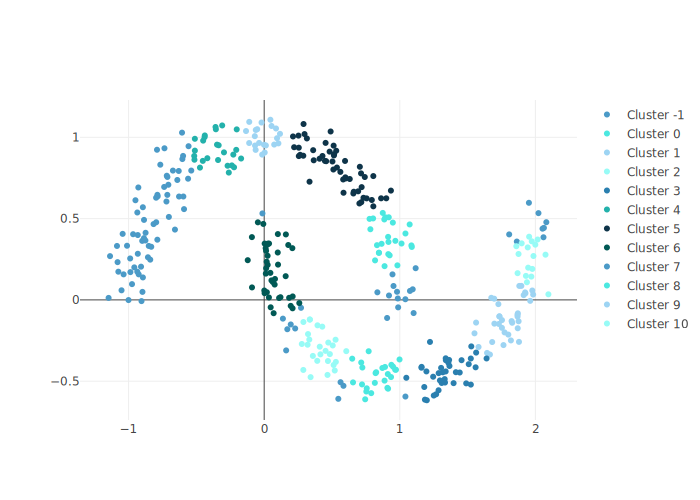

In [10]:
# Instanciate DBSCAN with high min_samples
db = DBSCAN(eps=0.2, min_samples=25, metric="euclidean", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

We only have a lot of *clusters*! Let's reduce our `min_sample`.

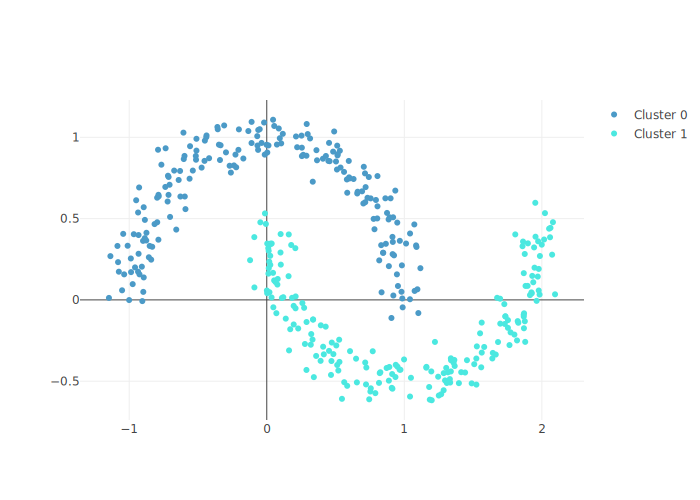

In [11]:
# Instanciate DBSCAN with LOW min_samples
db = DBSCAN(eps=0.2, min_samples=2, metric="euclidean", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

This time we have *no outliers* so every data points belong to one cluster.

## Distances 🏃‍♀️🏃‍♀️

You can also play around in the `metric` parameter. With this dataset, you won't see much of a difference but you can still try different values when dealing with other types of datasets.  

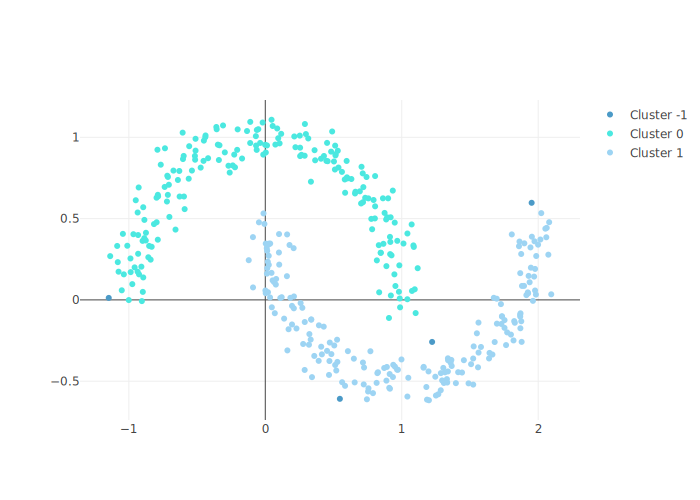

In [12]:
# Instanciate DBSCAN with manhattan distance
db = DBSCAN(eps=0.2, min_samples=10, metric="manhattan", algorithm="brute")

# Fit on data
## No need to normalize data, it already is!
db.fit(X)

# Visualize with plotly

## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

## Algorithm 🎰🎰

As a final note, you might see that each time we used `algorithm=brute`. This refers to the way DBSCAN is assigning observations to a given cluster. `brute` simply means that each data points are evaluated one-by-one.

You can also use `ballTree` or `KDtree`. It is a little beyond the scope of the course but you can find more information here 👉👉 <a href="https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940" target="_blank">Tree Algorithms explained ball tree algorithm VS KD Tree VS Brute Force</a>

What we advise is to use `auto` where `sklearn` will try to figure which approach is best.


## Resources 📚📚

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN" target="_blank">DBSCAN</a>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons" target="_blank">make_moons</a>

* <a href="https://plotly.com/python/creating-and-updating-figures/" target="_blank">Creating and updating figures</a>

* <a href="https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940" target="_blank">Tree Algorithms explained ball tree algorithm VS KD Tree VS Brute Force</a>

* <a href="https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms" target="_blank">Nearest Neighbor Algorithms</a>